 ph : 물의 ph 농도

 Hardness : 물의 경도 (물의 칼슘과 마그네슘 이온의 농도)

 Solids : 총용존 고형물 (액체가 아닌 모든 물질)

 Chloramines : 물 속의 클로라민 농도
	         (수돗물의 정화에 쓰이는 암모니아와 염소가 반응하여 생성되는 무색의 액체이다.)

 Sulfate : 물 속의 황산염 농도

 Conductivity : 물의 전기 전도도

 Organic_carbon : 물 속의 유기 탄소 함유량

 Trihalomethanes : 물 속의 트라이할로메탄 농도 (염소 소독시 발생하는 소독 부산물이다.)

 Turbidity : 물의 탁한 정도

 Potability : 음용성

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("data/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### 총 instance 갯수는 3276개
- ph, sulfate, Trihalomethanes에서 결측치 발생

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
len(data)

3276

In [5]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [6]:
print(data['ph'].mean())
print(data['Sulfate'].mean())
print(data['Trihalomethanes'].mean())

7.080794504276835
333.77577661081347
66.39629294676803


In [7]:
# 모든 행,열 출력하기
# => 모든 값이 다 높게 나오기에 평균으로 대체해도 될듯
# pd.set_option('display.max_rows', None)
data['Sulfate']

0       368.516441
1              NaN
2              NaN
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272           NaN
3273           NaN
3274           NaN
3275           NaN
Name: Sulfate, Length: 3276, dtype: float64

In [8]:
# 결측치 평균으로 대체
data = data.fillna(data.mean())

In [9]:
# 결측치 평균으로 대체된거 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
Xf = data.drop(['Potability'],axis=1)
yf = data['Potability']

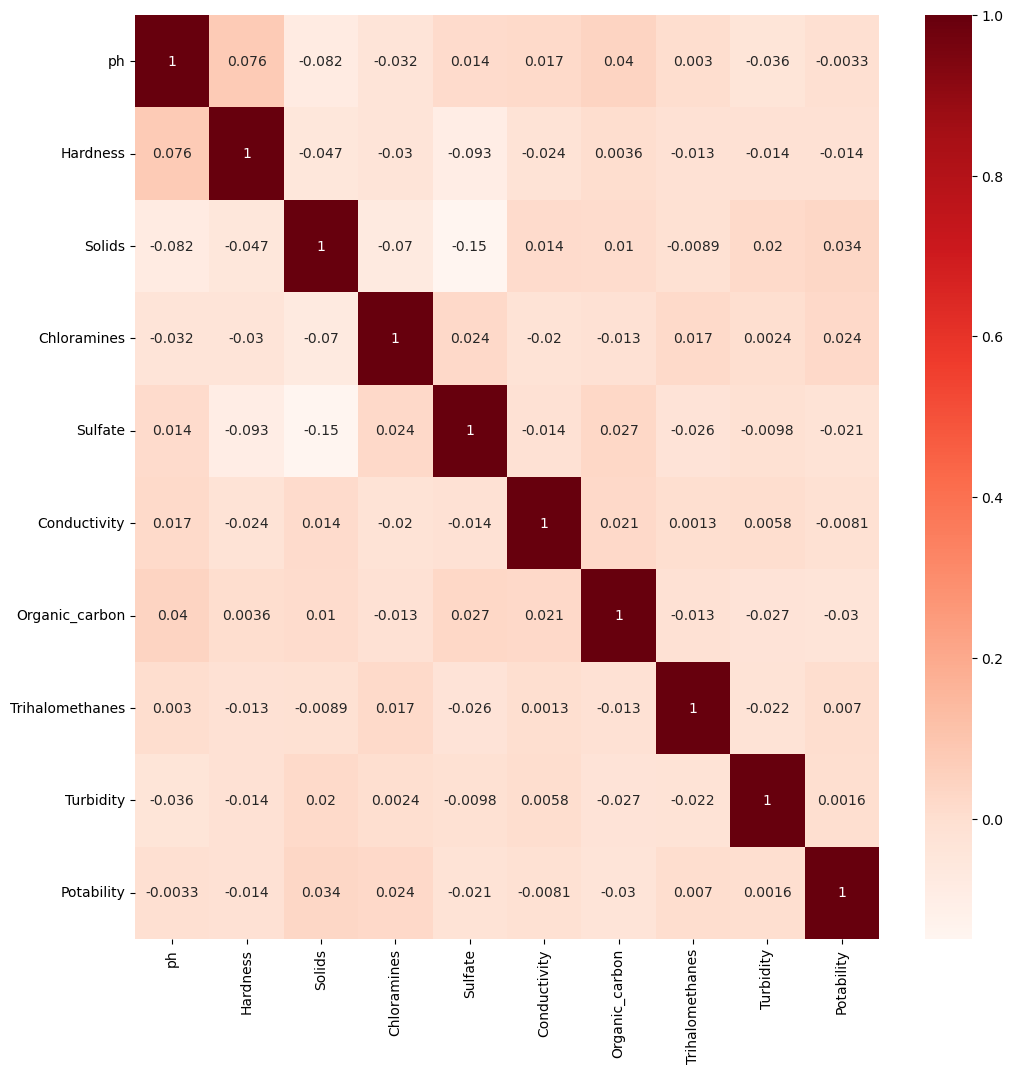

In [11]:
import seaborn as sns

plt.figure(figsize=(12,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
# train,test set을 7:3으로 나눔
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.3)

In [13]:
# feature importance로 입력변수 정하기
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    max_leaf_nodes = 16,
    max_features = 'auto',
    max_samples=0.5,
    bootstrap = True,
    n_jobs=-1
)

## feature selection 하기전 roc_auc 0.62

In [14]:
from sklearn.metrics import roc_auc_score

rnd_clf = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba = rnd_clf.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba))

0.6773694962636417


In [15]:
for name, score in zip(Xf.columns, rnd_clf.feature_importances_):
    print(name, score)

ph 0.12547327931912594
Hardness 0.11919652760161173
Solids 0.11122011038501414
Chloramines 0.1216851017364472
Sulfate 0.1252481414093488
Conductivity 0.10245433356996726
Organic_carbon 0.09729578420864922
Trihalomethanes 0.099421070519236
Turbidity 0.09800565125059972


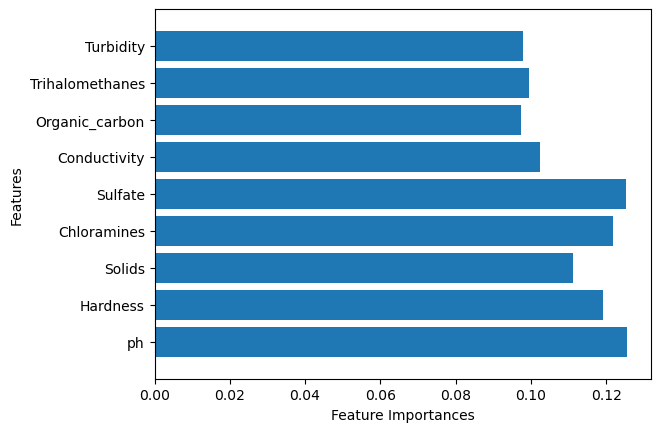

In [16]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xf_train.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(rnd_clf)

In [17]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Turbidity'],axis=1)
Xf_test=Xf_test.drop(['Turbidity'],axis=1)

## 중요도가 낮은걸 저장한 결과 roc_auc가 조금 더 낮아짐 하지만 별로 차이가 없기때문에 drop -> 입력변수는 적을 수록 좋음

In [18]:
rnd_clf1 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf1.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba1 = rnd_clf1.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba1))

0.6775397380069172


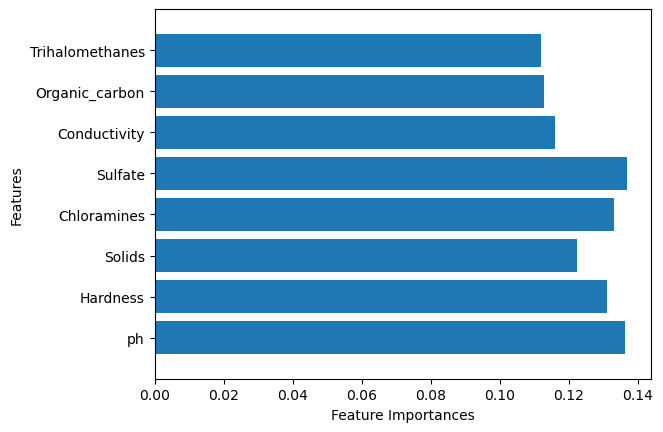

In [19]:
plot_feature_importances(rnd_clf1)

In [20]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Organic_carbon'],axis=1)
Xf_test=Xf_test.drop(['Organic_carbon'],axis=1)

In [21]:
rnd_clf2 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf2.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba2 = rnd_clf2.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba2))

0.6795467985592173


## Organic_carbon한 결과 68%로 성능이 좋아졌다

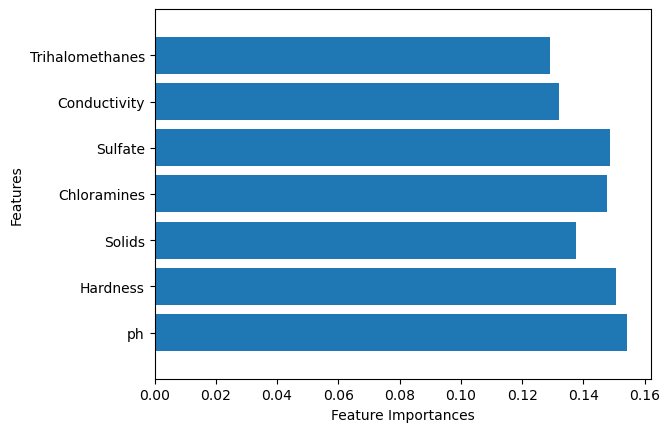

In [22]:
plot_feature_importances(rnd_clf2)

In [23]:
# feature 중요도가 가장 낮은 거 drop
Xf_train=Xf_train.drop(['Trihalomethanes'],axis=1)
Xf_test=Xf_test.drop(['Trihalomethanes'],axis=1)

In [24]:
# 성능이 더 안좋아지기에 더이상 feature importnace론 입력변수 구하지 않음

rnd_clf3 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf3.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba3 = rnd_clf3.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba3))

0.6900435460459114


In [25]:
Xf_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'], dtype='object')

## feature importance를 통해 입력변수 선정 - 6개
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

## vif로 입력변수 선정해보고자함

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame() # DF 생성
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

calc_vif(Xf_train)

,variables,VIF
0,ph,22.544411
1,Hardness,29.063853
2,Solids,6.663972
3,Chloramines,18.844848
4,Sulfate,45.644972
5,Conductivity,24.322536


In [27]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Sulfate'],axis=1)
Xf_test=Xf_test.drop(['Sulfate'],axis=1)

In [28]:
calc_vif(Xf_train)

,variables,VIF
0,ph,20.296244
1,Hardness,25.387796
2,Solids,6.594405
3,Chloramines,16.740658
4,Conductivity,21.559193


In [29]:
rnd_clf4 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf4.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba4 = rnd_clf4.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba4))

0.609725283586904


In [30]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Hardness'],axis=1)
Xf_test=Xf_test.drop(['Hardness'],axis=1)

In [31]:
calc_vif(Xf_train)

,variables,VIF
0,ph,16.862540
1,Solids,6.421735
2,Chloramines,15.248179
3,Conductivity,19.180968


In [32]:
rnd_clf5 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf5.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba5 = rnd_clf5.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba5))

0.5314028815655072


In [33]:
# 가장 vif가 높은 Sulfate drop
Xf_train=Xf_train.drop(['Conductivity'],axis=1)
Xf_test=Xf_test.drop(['Conductivity'],axis=1)

In [34]:
calc_vif(Xf_train)

,variables,VIF
0,ph,12.834285
1,Solids,5.971182
2,Chloramines,12.436056


In [35]:
rnd_clf6 = RandomForestClassifier(max_features='sqrt', random_state=42)
rnd_clf6.fit(Xf_train, yf_train)

# 예측 확률을 사용하여 AUC 계산
yf_pred_proba6 = rnd_clf6.predict_proba(Xf_test)[:, 1]
print(roc_auc_score(yf_test, yf_pred_proba6))

0.5306793541565866


# vif론 하면 독립변수를 구할 경우 roc_auc가 매우 안좋아짐으로 vif론 입력변수 정하지않고 feature importance로만 입력변수를 정함
'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'

In [36]:
X = data.drop(['Potability','ph','Hardness','Solids','Chloramines','Sulfate','Conductivity'],axis=1)
y = data['Potability']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

------------전처리끝-------------------

In [38]:
X_train.head()

,Organic_carbon,Trihalomethanes,Turbidity
11,14.525746,76.485911,4.011718
1070,18.261213,45.981624,4.344805
2727,11.260914,69.047159,3.086500
2611,12.531684,44.887843,4.523106
3173,13.351652,73.601918,3.769700


## Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

# 나이브 베이즈 분류기 생성 및 훈련
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [40]:
# 나이브 베이즈 분류기 평가
nb_accuracy = nb_classifier.score(X_test, y_test)
nb_accuracy

0.6021341463414634

<Figure size 800x600 with 0 Axes>

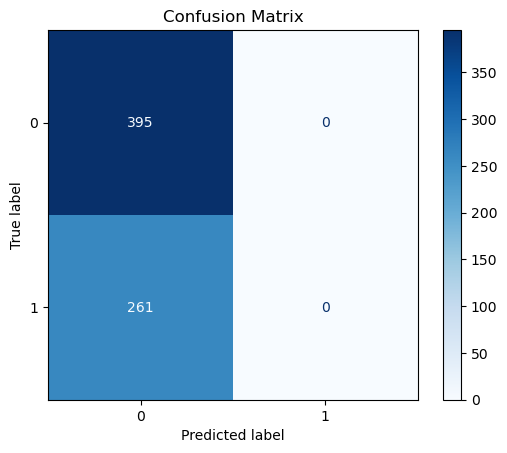

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

nb_pred = nb_classifier.predict(X_test)

nb_cm = confusion_matrix(y_test, nb_pred)

# 시각화
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## KNN (K Nearest Neighbors)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn_params_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV를 사용한 그리드 탐색
grid_search = GridSearchCV(KNeighborsClassifier(), knn_params_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# RandomizedSearchCV를 사용한 랜덤 탐색
# 랜덤 탐색에서는 더 많은 파라미터 범위와 시도 횟수를 지정할 수 있습니다.
random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_params_grid, n_iter=30, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 최적의 파라미터 및 그에 해당하는 정확도 출력
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

best_params_grid, best_score_grid, best_params_random, best_score_random

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'},
 0.5553435114503816,
 {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'},
 0.5553435114503816)

<Figure size 800x600 with 0 Axes>

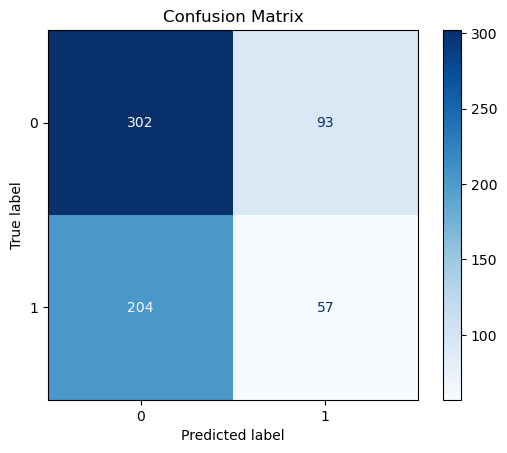

In [45]:
knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn_best.predict(X_test)

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Scale 조정

In [47]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# GridSearchCV를 사용한 그리드 탐색
grid_search = GridSearchCV(KNeighborsClassifier(), knn_params_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# RandomizedSearchCV를 사용한 랜덤 탐색
# 랜덤 탐색에서는 더 많은 파라미터 범위와 시도 횟수를 지정할 수 있습니다.
random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_params_grid, n_iter=30, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 및 그에 해당하는 정확도 출력
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

best_params_grid, best_score_grid, best_params_random, best_score_random

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'},
 0.5656488549618321,
 {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'},
 0.5656488549618321)

<Figure size 800x600 with 0 Axes>

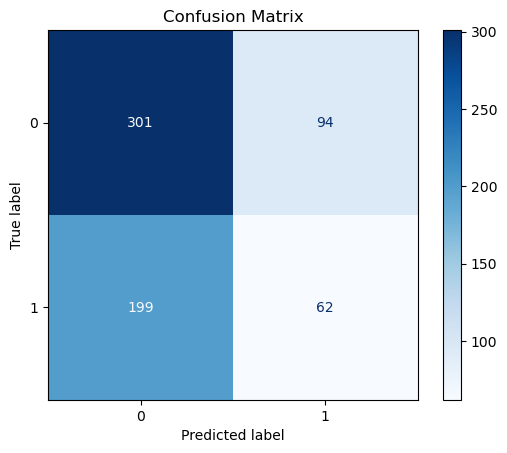

In [49]:
knn_best = grid_search.best_estimator_
knn_best.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn_best.predict(X_test_scaled)

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()